# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

from datetime import date

today = date.today()

date = today.strftime("%m/%d/%y")

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

In [3]:
# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name.capitalize()
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

        
    
# Print the city count to confirm sufficient count
len(cities)

597

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Set up URL

url = "http://api.openweathermap.org/data/2.5/weather?"
units="imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

query_url

'http://api.openweathermap.org/data/2.5/weather?appid=bf07decb51285129e7d8fc3985511c02&units=imperial&q='

In [5]:
# Set up lists to hold reponse info

existing_city=[]
city_errors=[]
lat = []
long = []
max_temp = []
humidity=[]
cloudiness=[]
wind_speed=[]
country=[]
date=[]
record_counter=0


print("Beginning Data Retrieval")
print("-"*20)
    
for city in cities:
    response=requests.get(query_url + city).json()

    
    try:
        lat.append(response['coord']['lat'])
        long.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        existing_city.append(city)
        record_counter=record_counter+1
        print(f"Processing Record {record_counter} | {city}")
        
    except KeyError:
        city_errors.append(city)
        print(f"**{city} not found. Skipping...**")
        


Beginning Data Retrieval
--------------------
Processing Record 1 | Bluff
Processing Record 2 | Nazarovo
Processing Record 3 | Georgetown
Processing Record 4 | Lalmohan
Processing Record 5 | Barrow
Processing Record 6 | Punta arenas
Processing Record 7 | Buluang
Processing Record 8 | Caribou
Processing Record 9 | Mahebourg
Processing Record 10 | Luderitz
Processing Record 11 | Sioux lookout
Processing Record 12 | Vaini
Processing Record 13 | Kapaa
Processing Record 14 | Yermakovskoye
Processing Record 15 | Kilindoni
Processing Record 16 | Bredasdorp
Processing Record 17 | Parana
Processing Record 18 | Totana
Processing Record 19 | Mataura
Processing Record 20 | Meadow lake
Processing Record 21 | Okhotsk
Processing Record 22 | Hualmay
Processing Record 23 | Busselton
Processing Record 24 | Saskylakh
Processing Record 25 | San policarpo
**Meyungs not found. Skipping...**
Processing Record 26 | Bethel
Processing Record 27 | Khatanga
Processing Record 28 | Korla
Processing Record 29 | Gido

Processing Record 229 | Kita
**Attawapiskat not found. Skipping...**
**Tabulbah not found. Skipping...**
Processing Record 230 | Srednekolymsk
Processing Record 231 | Sao filipe
Processing Record 232 | Port hardy
Processing Record 233 | Aklavik
Processing Record 234 | Shakawe
Processing Record 235 | Moratuwa
Processing Record 236 | Hovd
Processing Record 237 | Oranjemund
Processing Record 238 | Kirakira
Processing Record 239 | Mandurah
Processing Record 240 | Namatanai
Processing Record 241 | La grande
Processing Record 242 | Puerto escondido
Processing Record 243 | Moussoro
Processing Record 244 | Alpena
Processing Record 245 | El viejo
Processing Record 246 | Enshi
Processing Record 247 | Margate
Processing Record 248 | Alekseyevsk
Processing Record 249 | Poum
Processing Record 250 | Matara
Processing Record 251 | Anadyr
Processing Record 252 | Puerto baquerizo moreno
Processing Record 253 | Katherine
Processing Record 254 | Makokou
Processing Record 255 | Whitehorse
Processing Recor

Processing Record 461 | Nalut
Processing Record 462 | Harboore
Processing Record 463 | Iqaluit
Processing Record 464 | Birin
Processing Record 465 | Bouna
Processing Record 466 | Samfya
Processing Record 467 | Matagami
Processing Record 468 | Vanimo
Processing Record 469 | Lomovka
Processing Record 470 | Tabou
Processing Record 471 | Sao fidelis
Processing Record 472 | Kedrovyy
Processing Record 473 | Povenets
Processing Record 474 | Makoshyne
Processing Record 475 | Tres arroyos
Processing Record 476 | Chapais
Processing Record 477 | Davidson
Processing Record 478 | Lahaina
Processing Record 479 | Shancheng
**Bur gabo not found. Skipping...**
Processing Record 480 | Vestmannaeyjar
Processing Record 481 | Huaicheng
**Inderborskiy not found. Skipping...**
Processing Record 482 | Sorland
Processing Record 483 | Jammalamadugu
Processing Record 484 | Bonavista
Processing Record 485 | Fairbanks
Processing Record 486 | San jose
Processing Record 487 | Hermosillo
Processing Record 488 | Guaya

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
# create a data frame from cities, lat, and temp
weather_dict = {
    "City": existing_city,
    "Lat": lat,
    "Long": long,
    "Max Temp": max_temp,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": country,
    "Date": date
}
weather_df = pd.DataFrame(weather_dict)

#saving data frame to csv
weather_df.to_csv(output_data_file, index=False, header=True)

weather_df.head()

,City,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bluff,-46.6000,168.3333,34.81,79,100,2.24,NZ,1628083735
1,Nazarovo,56.0064,90.3914,62.73,94,90,1.68,RU,1628083736
2,Georgetown,5.4112,100.3354,84.88,82,20,2.30,MY,1628083736
3,Lalmohan,22.3384,90.7419,83.23,83,16,13.06,BD,1628083736
4,Barrow,71.2906,-156.7887,42.82,78,90,8.05,US,1628083737


In [7]:
weather_df.describe()

,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,5.580000e+02
mean,20.996828,17.481353,70.694624,68.372760,56.030466,7.892348,1.628084e+09
std,33.312835,92.376454,14.831330,22.302091,40.289537,5.811775,8.695790e+01
min,-54.800000,-179.166700,32.610000,6.000000,0.000000,0.000000,1.628083e+09
25%,-5.075700,-65.637300,60.297500,56.000000,10.250000,3.440000,1.628084e+09
50%,24.155450,21.259800,73.310000,74.000000,73.500000,6.645000,1.628084e+09
75%,49.750150,99.917650,80.482500,86.000000,97.000000,11.457500,1.628084e+09
max,78.218600,178.416700,111.380000,100.000000,100.000000,31.920000,1.628084e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
weather_df[weather_df["Humidity"].astype(float)>100]


,City,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [9]:
#  Get the indices of cities that have humidity over 100%.

#****no cities with humidity over 100 found. *****

In [10]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

#n/a

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

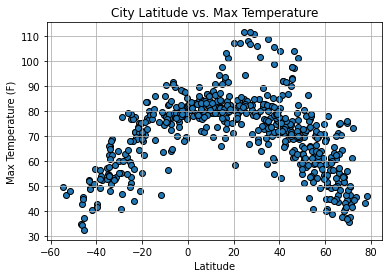

Analysis:
This plot is analyzing the current max temperatures at latitudes.
Temperatures appear to be higher as they get closer to latitude 20.
Temperatures decrease the further away they are from latitude 20 in either direction.


In [11]:
x_values = weather_df["Lat"]
y_values = weather_df["Max Temp"]
plt.scatter(x_values,y_values, edgecolor="black")
plt.title(f"City Latitude vs. Max Temperature")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid(True)

# Save the figure
plt.savefig("output/City Latitude vs Max Temp.png")

plt.show()

print("Analysis:")
print("This plot is analyzing the current max temperatures at latitudes.")
print("Temperatures appear to be higher as they get closer to latitude 20.")
print("Temperatures decrease the further away they are from latitude 20 in either direction.")

## Latitude vs. Humidity Plot

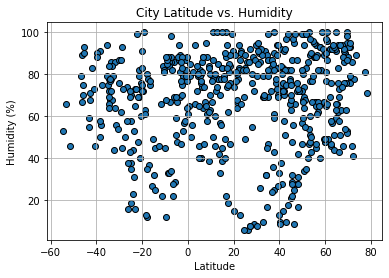

Analysis:
This plot is analyzing the current % of humidity at latitudes.
Humidity % exists across the board but appears to be more dense
at latitude 0.


In [12]:
x_values = weather_df["Lat"]
y_values = weather_df["Humidity"]
plt.scatter(x_values,y_values, edgecolor="black")
plt.title(f"City Latitude vs. Humidity")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)

# Save the figure
plt.savefig("output/City Latitude vs Humidity.png")

plt.show()

print("Analysis:")
print("This plot is analyzing the current % of humidity at latitudes.")
print("Humidity % exists across the board but appears to be more dense")
print("at latitude 0.")

## Latitude vs. Cloudiness Plot

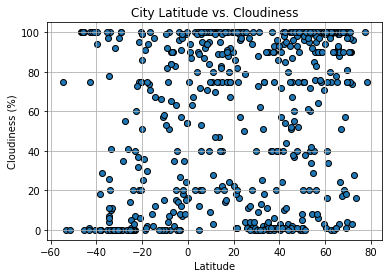

Analysis:
This plot is analyzing the current % of cloudiness at latitudes.
Cloudiness % appears to be more dense between latitude 0 and 25.


In [13]:
x_values = weather_df["Lat"]
y_values = weather_df["Cloudiness"]
plt.scatter(x_values,y_values, edgecolor="black")
plt.title(f"City Latitude vs. Cloudiness")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)

# Save the figure
plt.savefig("output/City Latitude vs Cloudiness.png")


plt.show()

print("Analysis:")
print("This plot is analyzing the current % of cloudiness at latitudes.")
print("Cloudiness % appears to be more dense between latitude 0 and 25.")

## Latitude vs. Wind Speed Plot

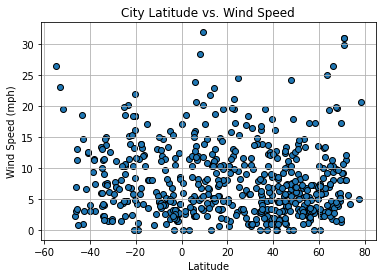

Analysis:
This plot is analyzing the current wind speed at latitudes.
Wind speed is mostly under 15mph but appears to increase more
the closer it is to latitudes 0 and 20.


In [14]:
x_values = weather_df["Lat"]
y_values = weather_df["Wind Speed"]
plt.scatter(x_values,y_values, edgecolor="black")
plt.title(f"City Latitude vs. Wind Speed")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid(True)

# Save the figure
plt.savefig("output/City Latitude vs Wind Speed.png")


plt.show()

print("Analysis:")
print("This plot is analyzing the current wind speed at latitudes.")
print("Wind speed is mostly under 15mph but appears to increase more")
print("the closer it is to latitudes 0 and 20.")

## Linear Regression

In [15]:
# Create reduced northern and southern hemisphere dataframes for linear regressions

northern_hem_df=weather_df[weather_df["Lat"]>=0]
southern_hem_df=weather_df[weather_df["Lat"]<0]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.6723360232949563
The p-value is: 6.821776125136633e-53


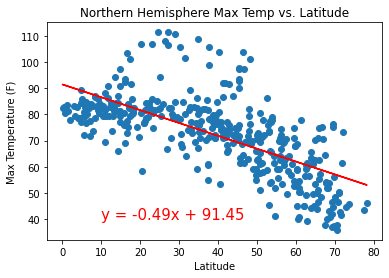

Analysis:
This plot is analyzing the current max temperature of cities
located in the northern hemisphere.
Many temps increase the closer they are to the equator.
The high r-value tells us it is representative of most of the data.


In [16]:
x_values = northern_hem_df["Lat"]
y_values = northern_hem_df["Max Temp"]
slope, intercept, r_value, p_value, stderr = linregress(x_values,y_values)
regress_values=x_values*slope+intercept
line_eq="y = "+str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,40),fontsize=15,color="red")
plt.title(f'Northern Hemisphere Max Temp vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
print(f"The r-value is: {r_value}")
print(f"The p-value is: {p_value}")

# Save the figure
plt.savefig("output/Northern Hemisphere Temp vs Latitude.png")


plt.show()

print('Analysis:')
print("This plot is analyzing the current max temperature of cities")
print("located in the northern hemisphere.")
print("Many temps increase the closer they are to the equator.")
print("The high r-value tells us it is representative of most of the data.")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.8071637129874577


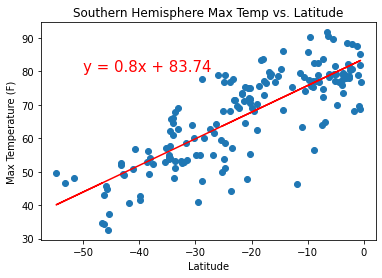

Analysis:
This plot is analyzing the current max temperature of cities
located in the southern hemisphere.
Like in the northern hemisphere, many temps increase the closer they are to the equator.
The high r-value tells us it is representative of most of the data.


In [17]:
x_values = southern_hem_df["Lat"]
y_values = southern_hem_df["Max Temp"]
slope, intercept, r_value, p_value, stderr = linregress(x_values,y_values)
regress_values=x_values*slope+intercept
line_eq="y = "+str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,80),fontsize=15,color="red")
plt.title(f'Southern Hemisphere Max Temp vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
print(f"The r-value is: {r_value}")

# Save the figure
plt.savefig("output/Southern Hemisphere Temp vs Latitude.png")


plt.show()

print('Analysis:')
print("This plot is analyzing the current max temperature of cities")
print("located in the southern hemisphere.")
print("Like in the northern hemisphere, many temps increase the closer they are to the equator.")
print("The high r-value tells us it is representative of most of the data.")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.05047853830602691


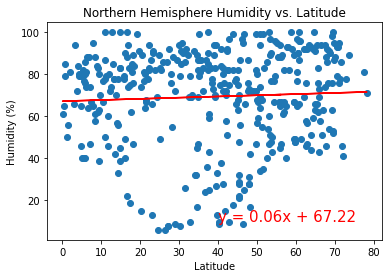

Analysis:
This plot is analyzing the current humidity of cities
located in the northern hemisphere.
Humidity seems mid to high for most cities in the northern hemisphere.
There is a slight positive correlation closer to the equator.
The low r-value tells us it is not representative of most of the data.


In [19]:
x_values = northern_hem_df["Lat"]
y_values = northern_hem_df["Humidity"]
slope, intercept, r_value, p_value, stderr = linregress(x_values,y_values)
regress_values=x_values*slope+intercept
line_eq="y = "+str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,10),fontsize=15,color="red")
plt.title(f'Northern Hemisphere Humidity vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
print(f"The r-value is: {r_value}")

# Save the figure
plt.savefig("output/Northern Hemisphere Humidity vs Latitude.png")


plt.show()

print('Analysis:')
print("This plot is analyzing the current humidity of cities")
print("located in the northern hemisphere.")
print("Humidity seems mid to high for most cities in the northern hemisphere.")
print("There is a slight positive correlation closer to the equator.")
print("The low r-value tells us it is not representative of most of the data.")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: -0.030547073788141966


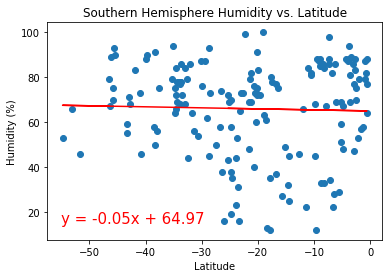

Analysis:
This plot is analyzing the current humidity of cities
located in the southern hemisphere.
Humidity seems mid to high for most cities in the southern hemisphere.
There is a slight positive correlation for cities closer to the equator.
The low r-value tells us it is not representative of most of the data.


In [20]:
x_values = southern_hem_df["Lat"]
y_values = southern_hem_df["Humidity"]
slope, intercept, r_value, p_value, stderr = linregress(x_values,y_values)
regress_values=x_values*slope+intercept
line_eq="y = "+str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,15),fontsize=15,color="red")
plt.title(f'Southern Hemisphere Humidity vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
print(f"The r-value is: {r_value}")

# Save the figure
plt.savefig("output/Southern Hemisphere Humidity vs Latitude.png")


plt.show()

print('Analysis:')
print("This plot is analyzing the current humidity of cities")
print("located in the southern hemisphere.")
print("Humidity seems mid to high for most cities in the southern hemisphere.")
print("There is a slight positive correlation for cities closer to the equator.")
print("The low r-value tells us it is not representative of most of the data.")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.014698442823080185


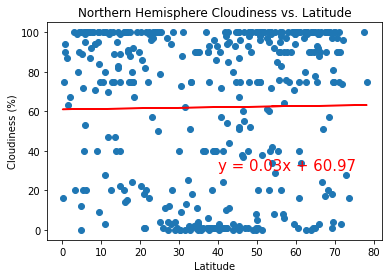

Analysis:
This plot is analyzing the current cloudiness of cities
located in the northern hemisphere.
Cloudiness is split between extremely cloudy or not cloudy at all.
There is a slight positive correlation for cities closer to the equator.
The low r-value tells us it is not representative of most of the data
but we can see on the graph that number is being swayed by both ends of the spectrum.


In [21]:
x_values = northern_hem_df["Lat"]
y_values = northern_hem_df["Cloudiness"]
slope, intercept, r_value, p_value, stderr = linregress(x_values,y_values)
regress_values=x_values*slope+intercept
line_eq="y = "+str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,30),fontsize=15,color="red")
plt.title(f'Northern Hemisphere Cloudiness vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
print(f"The r-value is: {r_value}")

# Save the figure
plt.savefig("output/Northern Hemisphere Cloudiness vs Latitude.png")


plt.show()

print('Analysis:')
print("This plot is analyzing the current cloudiness of cities")
print("located in the northern hemisphere.")
print("Cloudiness is split between extremely cloudy or not cloudy at all.")
print("There is a slight positive correlation for cities closer to the equator.")
print("The low r-value tells us it is not representative of most of the data")
print("but we can see on the graph that number is being swayed by both ends of the spectrum.")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.051224757564660134


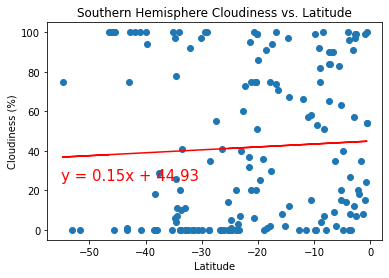

Analysis:
This plot is analyzing the current cloudiness of cities
located in the southern hemisphere.
There is a slight positive correlation for cities closer to the equator.
The low r-value tells us it is not representative of most of the data


In [22]:
x_values = southern_hem_df["Lat"]
y_values = southern_hem_df["Cloudiness"]
slope, intercept, r_value, p_value, stderr = linregress(x_values,y_values)
regress_values=x_values*slope+intercept
line_eq="y = "+str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,25),fontsize=15,color="red")
plt.title(f'Southern Hemisphere Cloudiness vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
print(f"The r-value is: {r_value}")

# Save the figure
plt.savefig("output/Southern Hemisphere Cloudiness vs Latitude.png")


plt.show()

print('Analysis:')
print("This plot is analyzing the current cloudiness of cities")
print("located in the southern hemisphere.")
print("There is a slight positive correlation for cities closer to the equator.")
print("The low r-value tells us it is not representative of most of the data")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.09234871376385138


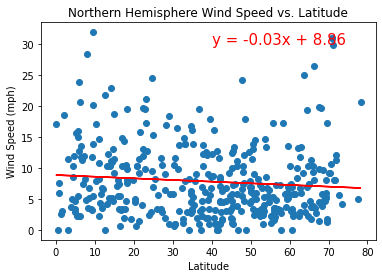

Analysis:
This plot is analyzing the current wind speed of cities
located in the northern hemisphere.
There is a slight positive correlation for cities closer to the equator.
The low r-value tells us it is not representative of most of the data


In [23]:
x_values = northern_hem_df["Lat"]
y_values = northern_hem_df["Wind Speed"]
slope, intercept, r_value, p_value, stderr = linregress(x_values,y_values)
regress_values=x_values*slope+intercept
line_eq="y = "+str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,30),fontsize=15,color="red")
plt.title(f'Northern Hemisphere Wind Speed vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
print(f"The r-value is: {r_value}")

# Save the figure
plt.savefig("output/Northern Hemisphere Wind Speed vs Latitude.png")


plt.show()

print('Analysis:')
print("This plot is analyzing the current wind speed of cities")
print("located in the northern hemisphere.")
print("There is a slight positive correlation for cities closer to the equator.")
print("The low r-value tells us it is not representative of most of the data")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.21814629167171437


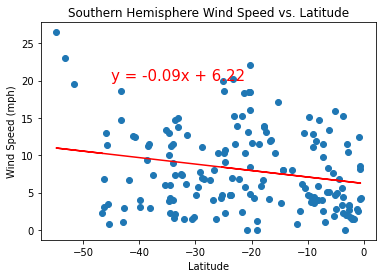

Analysis:
This plot is analyzing the current wind speed of cities
located in the southern hemisphere.
There is a slight negative correlation for cities closer to the equator.
The low r-value tells us it is not representative of most of the data


In [24]:
x_values = southern_hem_df["Lat"]
y_values = southern_hem_df["Wind Speed"]
slope, intercept, r_value, p_value, stderr = linregress(x_values,y_values)
regress_values=x_values*slope+intercept
line_eq="y = "+str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-45,20),fontsize=15,color="red")
plt.title(f'Southern Hemisphere Wind Speed vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
print(f"The r-value is: {r_value}")

# Save the figure
plt.savefig("output/Southern Hemisphere Wind Speed vs Latitude.png")


plt.show()

print('Analysis:')
print("This plot is analyzing the current wind speed of cities")
print("located in the southern hemisphere.")
print("There is a slight negative correlation for cities closer to the equator.")
print("The low r-value tells us it is not representative of most of the data")